# U(x, t + dt) = u(x,t) + D[(u(x+dx, t)+u(x-dx,t) - 2u(x, t))/(dx)^2]

In [17]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import matplotlib.pyplot as plt
import numpy as np

Time: 0.0


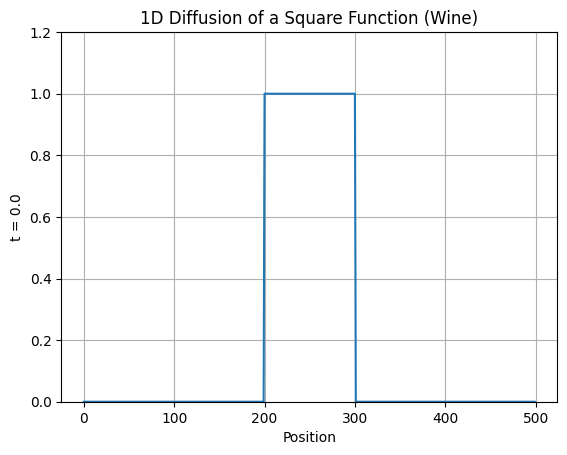

Time: 2000.0


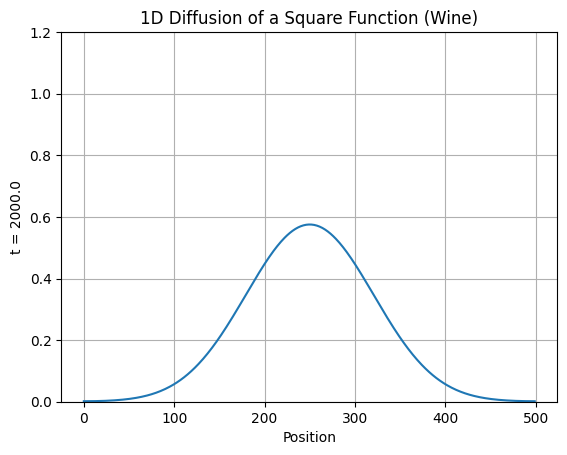

Time: 4000.0


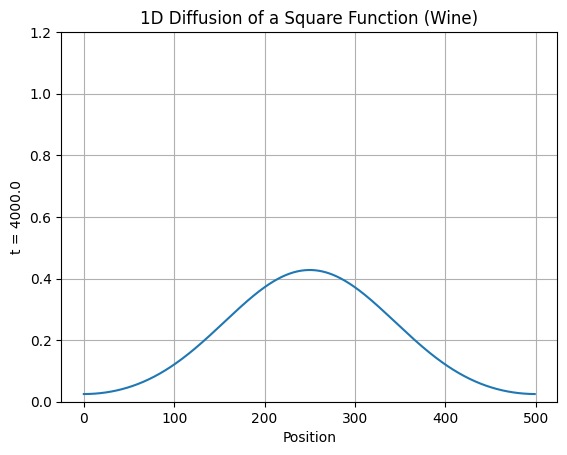

Time: 6000.0


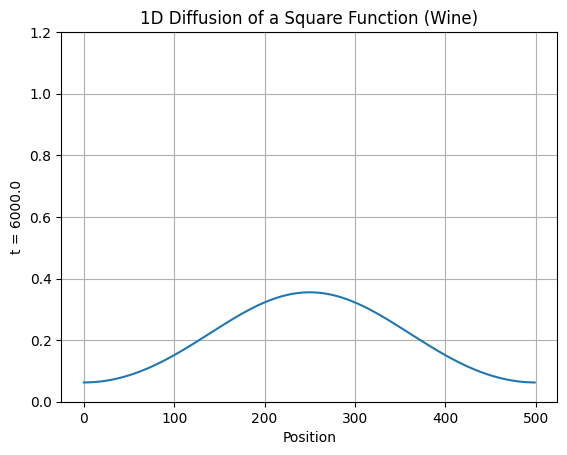

Time: 8000.0


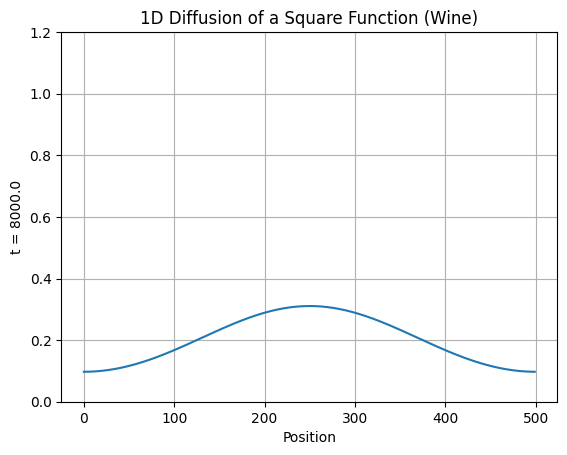

Time: 10000


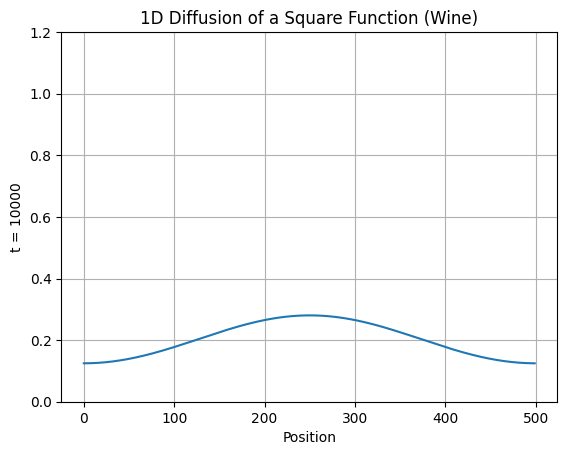

In [19]:

# Parameter Definition
xmax = 500
dx = 1
grid_shape = xmax // dx
u = [0.0] * grid_shape
D = 1
tmax = 10_000
dt = 0.1

# Initial Condition
for i in range(grid_shape):
  if  i >= 200 and i <=300 :
    u[i] = 1.0

def plot_u(u, time):
  plt.plot(u)
  plt.xlabel("Position")
  plt.ylabel(f"t = {time}")
  plt.title("1D Diffusion of a Square Function (Wine)")
  plt.grid(True)
  plt.ylim(0, 1.2)
  plt.show()


# Evolution
for i in range(int(tmax / dt)):
  unew = [0.0] * grid_shape

  # Visualization of Diffusion
  if i % (int(tmax / dt) // 5) == 0:
    print(f"Time: {i * dt}")
    plot_u(u, i * dt)

  for i in range(grid_shape):
    unew[i] = u[i] + D * ((u[(i+1) % grid_shape] + u[(i-1) % grid_shape] -2*u[i]) / (dx ** 2)) * dt

  u = unew

print(f"Time: {tmax}")
plot_u(u, tmax)

# 2D Diffusion

In [20]:
grid_shape = (600, 600)

def evolve(grid, dt, D = 1.0):
    #The following function will assume that dx = 1
    xmax, ymax = grid_shape #This is a particular situation due to dx = 1
    new_grid = [[0.0] * ymax for x in range(xmax)]

    for i in range(xmax):
        for j in range(ymax):
            dxx = grid[(i+1)%xmax][j] + grid[(i-1)%xmax][j] - 2*grid[i][j] # /(dx**2)
            dyy = grid[i][(j+1)%ymax] + grid[i][(j-1)%ymax] - 2*grid[i][j] # /(dx**2)
            new_grid[i][j] = grid[i][j] + D * (dxx+dyy) *dt
    return new_grid

In [21]:
def plot_grid(grid):
    plt.imshow(grid, cmap = 'viridis', interpolation = 'nearest')
    plt.xlabel("X")
    plt.ylabel(f"Y")
    plt.title("2D Diffusion of Square Function (Wine)")
    plt.grid(True)
    plt.show()

In [22]:
def run_experiment(num_iterations):
    # Parameter Definition
    xmax, ymax = grid_shape
    grid = [[0.0] * ymax for x in range(xmax)]

    #Initial Conditions
    block_low = int(xmax * 0.4)
    block_high = int(xmax * 0.6)
    for i in range(block_low, block_high):
        for j in range(block_low, block_high):
            grid[i][j] = 0.005

    #Evolve Initial Conditions
    for i in range(num_iterations):
        if i % (num_iterations // 4) == 0:
            plot_grid(grid)
        grid = evolve(grid, 0.1, D = 1)

    plot_grid(grid)

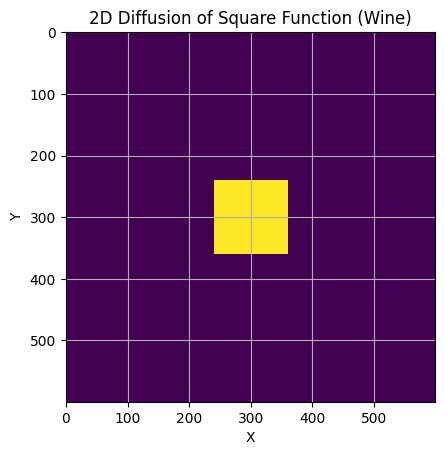

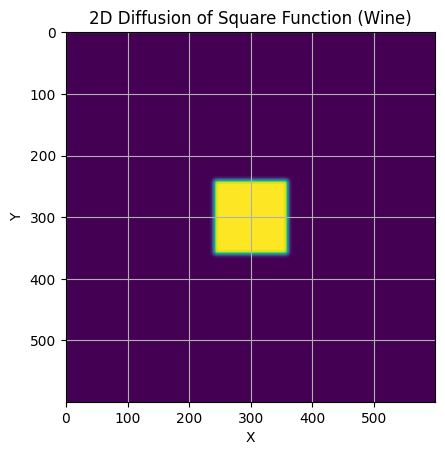

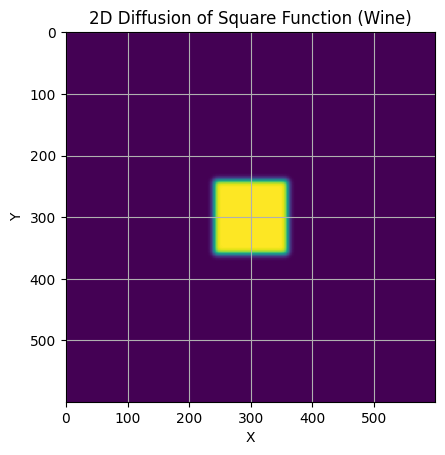

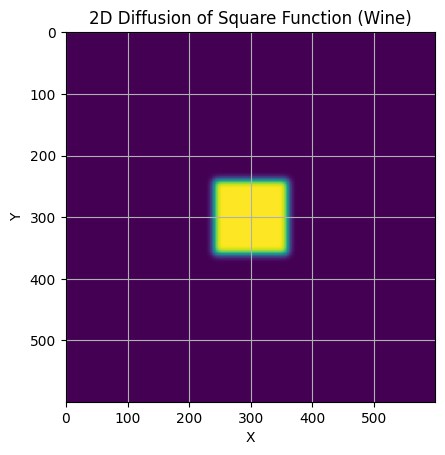

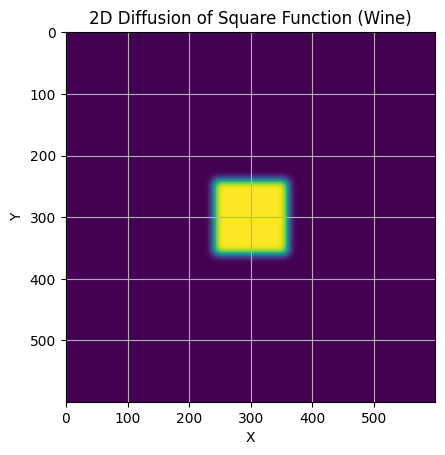

In [25]:
run_experiment(200)

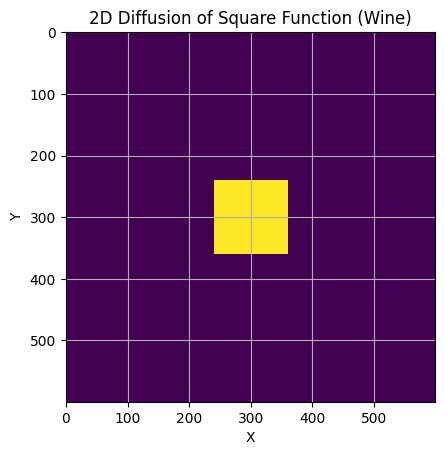

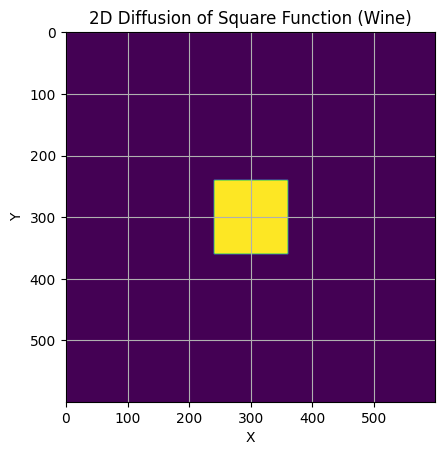

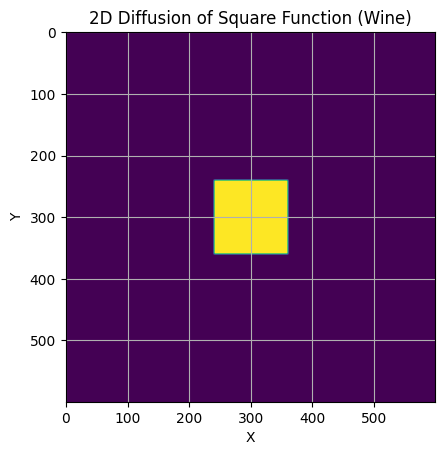

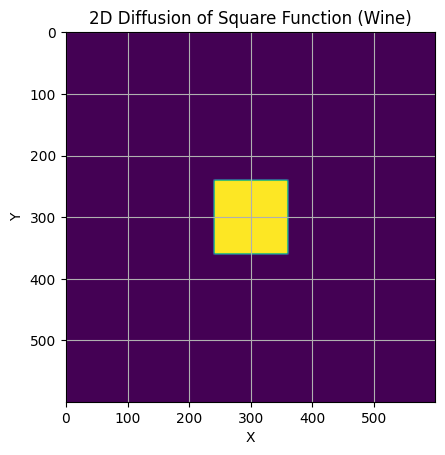

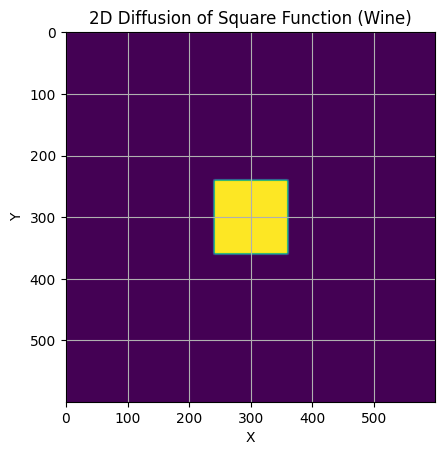

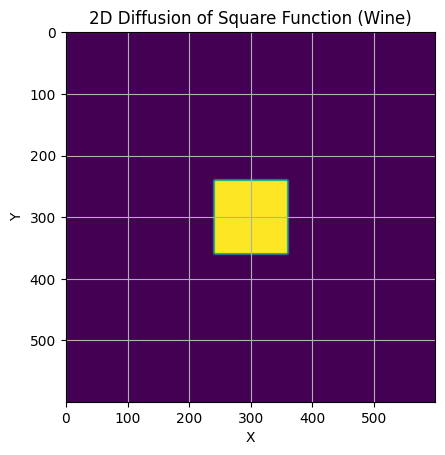

TypeError: Image data of dtype object cannot be converted to float

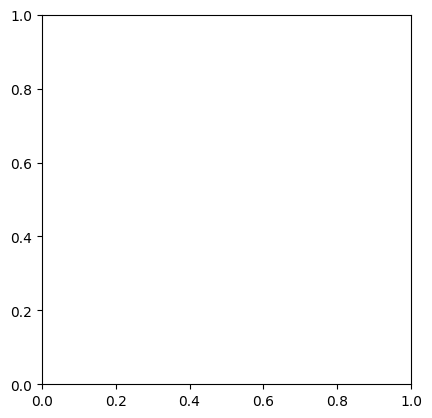

In [27]:
grid = run_experiment(10)
plot_grid(grid)

In [28]:
a = [[0.0] * 10 for x in range(10) ]
a

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [ ]:
%pip install line-profiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 714.8/714.8 kB 6.0 MB/s eta 0:00:00


# 3. Numpy

In [50]:
def norm_square_list(vector):
    # calculate norm square considering vector as a list
    norm_square = 0
    for i in range(len(vector)):
        norm_square += vector[i] ** 2
    return norm_square


In [51]:
test_vector = list(range(100000))

In [53]:
def norm_square_comprehension_list(vector):
    # calculate norm square using list comprehension
    return sum([x*x for x in vector])

In [54]:
%timeit norm_square_list(test_vector)

7.78 ms ± 914 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [55]:
%timeit norm_square_comprehension_list(test_vector)

7.4 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [61]:
test_array = np.array(test_vector)

In [47]:
def norm_square_array(vector):
    # calculate norm square considering vector as a list
    norm_square = 0
    for i in range(len(vector)):
        norm_square += vector[i] ** 2
    return norm_square


In [49]:
%timeit norm_square_array(test_array)

C:\Users\juanj\AppData\Local\Temp\ipykernel_10836\1264790620.py:5: RuntimeWarning: overflow encountered in scalar add
  norm_square += vector[i] ** 2


28.7 ms ± 337 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [57]:
def norm_square_numpy(vector):
    return np.sum(vector * vector)

In [59]:
def norm_square_numpy_dot(vector):
    return np.dot(vector, vector)

In [63]:
%timeit norm_square_numpy_dot(test_array)

40 µs ± 696 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [64]:
a = [1,2,3,4,5]

In [65]:
np.roll(a, 1)

array([5, 1, 2, 3, 4])

In [66]:
np.roll(a, -1)

array([2, 3, 4, 5, 1])

In [67]:
b = [[1,2,3], [4,5,6], [7,8,9]]

In [68]:
np.roll(b, 1, axis = 0)

array([[7, 8, 9],
       [1, 2, 3],
       [4, 5, 6]])

In [69]:
np.roll(b, 1, axis = 1)

array([[3, 1, 2],
       [6, 4, 5],
       [9, 7, 8]])

In [75]:
def laplacian(grid):
    return (np.roll(grid, 1, axis = 0) + 
            np.roll(grid, -1, axis = 0) + 
            np.roll(grid, 1, axis = 1) + 
            np.roll(grid, -1, axis = 1) - 
            4*grid)

In [71]:
def evolve(grid, dt, D = 1.0):
    return grid + dt * D * laplacian(grid)

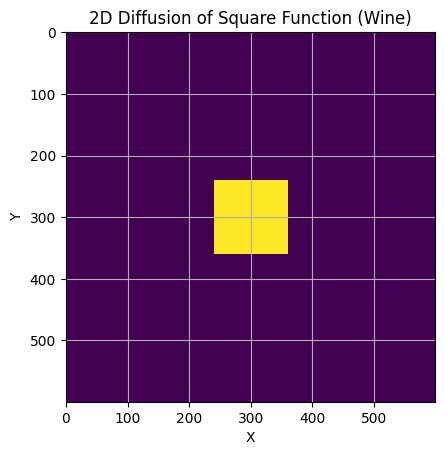

ValueError: operands could not be broadcast together with shapes (600,600) (2400,600) 

In [76]:
grid = run_experiment(100000)
plot_grid(grid)